# Auto-encoders

## Aim: To implement Auto-encoders to denoise images.
## Dataset: Folder containing 2 sets of images i.e Original Image and Noise Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D,Flatten
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.preprocessing.image import ImageDataGenerator
from google.colab.patches import cv2_imshow
from keras import layers,Model
import warnings
warnings.filterwarnings('ignore')

In [ ]:
datagen =ImageDataGenerator()

x_test_dataset = datagen.flow_from_directory('/content/drive/MyDrive/AE/test_noise',
                                              batch_size=13,
                                             target_size=(256,256),
                                                  shuffle =False)
x_test,_=x_test_dataset.next()

x_train_dataset = datagen.flow_from_directory('/content/drive/MyDrive/AE/train_noise',
                                             batch_size=53,
                                              target_size=(256,256),
                                                  shuffle =False)
x_train,_=x_train_dataset.next()

x_val_dataset = datagen.flow_from_directory('/content/drive/MyDrive/AE/val_noise',
                                            batch_size=11,
                                            target_size=(256,256),
                                                  shuffle =False)
x_val,_=x_val_dataset.next()

Found 13 images belonging to 1 classes.
Found 53 images belonging to 1 classes.
Found 11 images belonging to 1 classes.


In [ ]:
datagen =ImageDataGenerator()

y_test_dataset = datagen.flow_from_directory('/content/drive/MyDrive/AE/test',
                                              batch_size=13,
                                             target_size=(256,256),
                                                  shuffle =False)
y_test,_=y_test_dataset.next()

y_train_dataset = datagen.flow_from_directory('/content/drive/MyDrive/AE/train',
                                             batch_size=53,
                                              target_size=(256,256),
                                                  shuffle =False)
y_train,_=y_train_dataset.next()

y_val_dataset = datagen.flow_from_directory('/content/drive/MyDrive/AE/val',
                                            batch_size=11,
                                            target_size=(256,256),
                                                  shuffle =False)
y_val,_=y_val_dataset.next()

Found 13 images belonging to 1 classes.
Found 53 images belonging to 1 classes.
Found 11 images belonging to 1 classes.


In [ ]:
x_train[0].shape

(256, 256, 3)

In [ ]:
y_train[0].shape

(256, 256, 3)

In [ ]:
# model = Sequential()
# # encoder network
# model.add(Conv2D(35, 3, activation= 'relu', padding='same', input_shape = (256,256,3)))
# model.add(MaxPooling2D(2, padding= 'same'))
# model.add(Conv2D(25, 3, activation= 'relu', padding='same'))
# model.add(MaxPooling2D(2, padding= 'same'))
# #decoder network
# model.add(Conv2D(25, 3, activation= 'relu', padding='same'))
# model.add(UpSampling2D(2))
# model.add(Conv2D(35, 3, activation= 'relu', padding='same'))
# model.add(UpSampling2D(2))
# model.add(Conv2D(3,3,activation='relu', padding= 'same')) # output layer
# model.compile(optimizer= 'adam', loss = 'binary_crossentropy',
#           metrics=['accuracy'])
# model.summary()
# model.fit(x_train,y_train,
#                 epochs=15,
#                 validation_data=(x_val,y_val))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 35)      980       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 35)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 25)      7900      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 25)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 25)        5650      
                                                                 
 up_sampling2d (UpSampling2D  (None, 128, 128, 25)     0

In [ ]:
input = layers.Input(shape=(256,256,3))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(3, (3, 3), activation="relu", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy", metrics = "accuracy")
autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 128, 128, 32)     9248  

In [ ]:
history=autoencoder.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=5)

Epoch 1/5
2/2 [==============================] - 14s 7s/step - loss: -1258.5051 - accuracy: 0.5465 - val_loss: -1547.6626 - val_accuracy: 0.6554
Epoch 2/5
2/2 [==============================] - 14s 7s/step - loss: -1258.5052 - accuracy: 0.5465 - val_loss: -1547.6626 - val_accuracy: 0.6554
Epoch 3/5
2/2 [==============================] - 15s 7s/step - loss: -1258.5052 - accuracy: 0.5465 - val_loss: -1547.6626 - val_accuracy: 0.6554
Epoch 4/5
2/2 [==============================] - 15s 8s/step - loss: -1258.5055 - accuracy: 0.5464 - val_loss: -1547.6626 - val_accuracy: 0.6554
Epoch 5/5
2/2 [==============================] - 15s 7s/step - loss: -1258.5056 - accuracy: 0.5464 - val_loss: -1547.6626 - val_accuracy: 0.6553


In [ ]:
# train_eva=model.evaluate(x_train,y_train)
# val_eva=model.evaluate(x_val,y_val)
# test_eva=model.evaluate(x_test,y_test)

1/1 [==============================] - 1s 923ms/step - loss: -1425.3035 - accuracy: 0.3465


In [ ]:
# y_pred=model.predict(x_test)

1/1 [==============================] - 1s 1s/step


In [ ]:
y_pred=autoencoder.predict(x_test)

1/1 [==============================] - 1s 764ms/step



Original Image



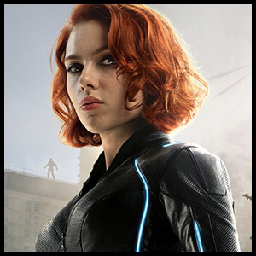


Input Image



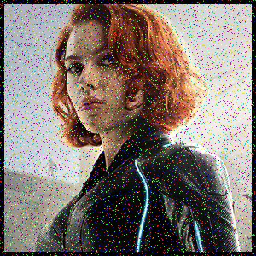


Denoised Image



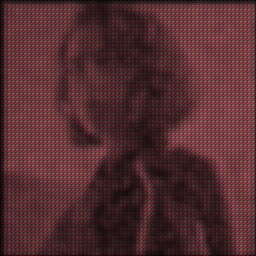


********************************************************

Original Image



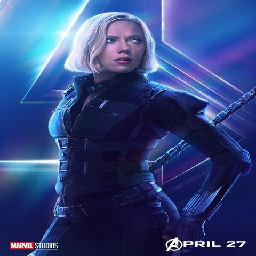


Input Image



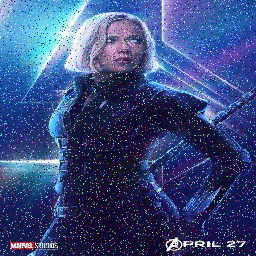


Denoised Image



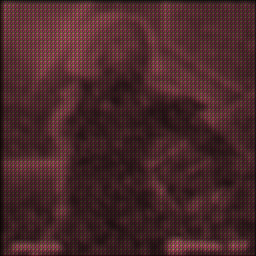


********************************************************

Original Image



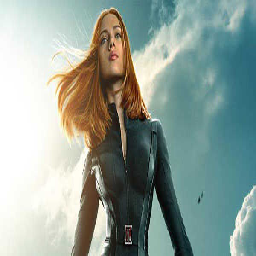


Input Image



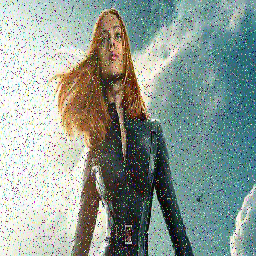


Denoised Image



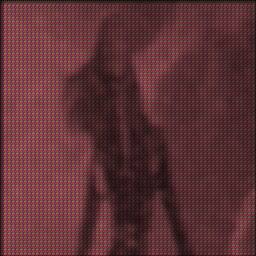


********************************************************

Original Image



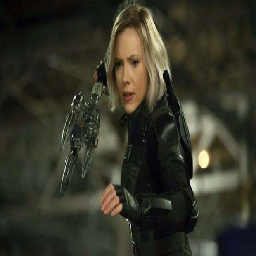


Input Image



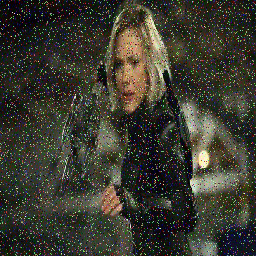


Denoised Image



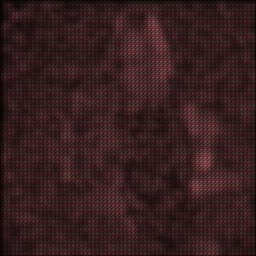


********************************************************

Original Image



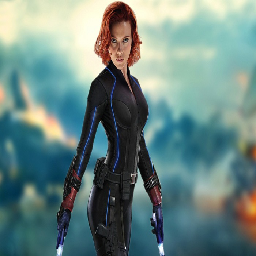


Input Image



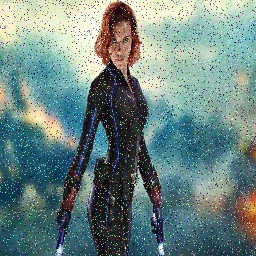


Denoised Image



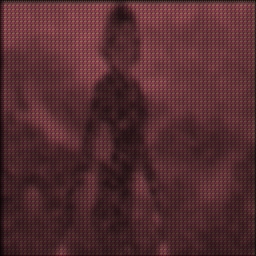


********************************************************

Original Image



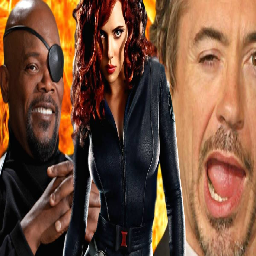


Input Image



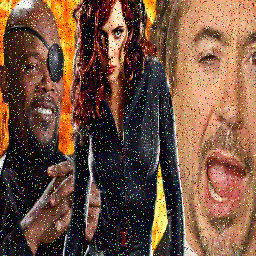


Denoised Image



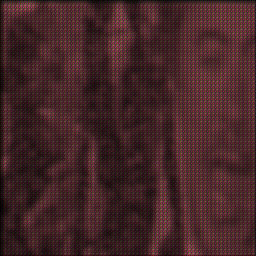


********************************************************

Original Image



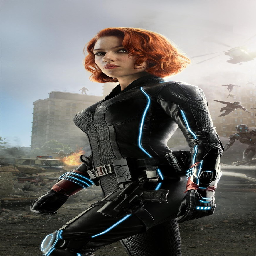


Input Image



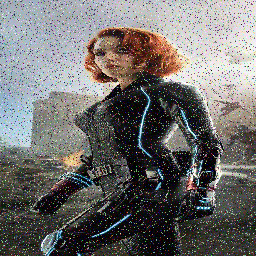


Denoised Image



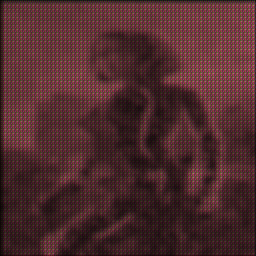


********************************************************

Original Image



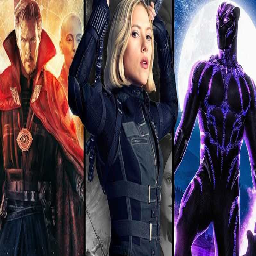


Input Image



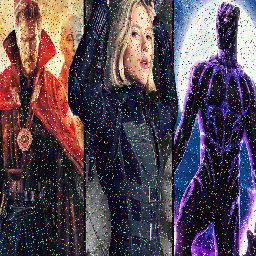


Denoised Image



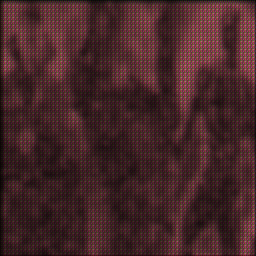


********************************************************

Original Image



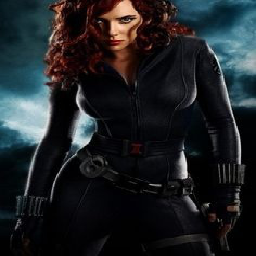


Input Image



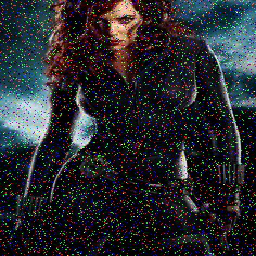


Denoised Image



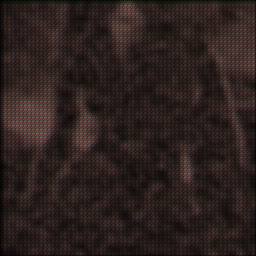


********************************************************

Original Image



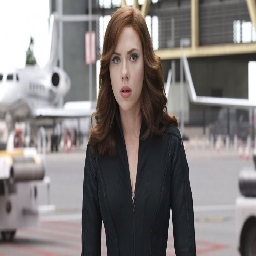


Input Image



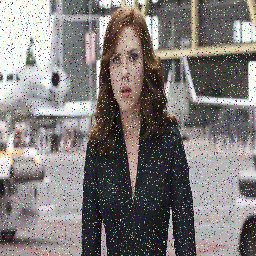


Denoised Image



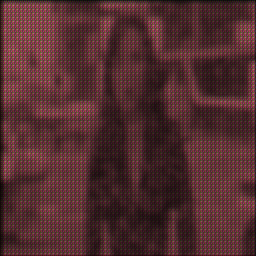


********************************************************

Original Image



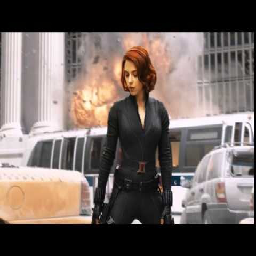


Input Image



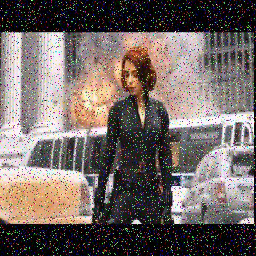


Denoised Image



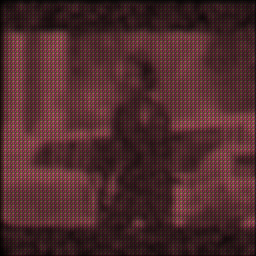


********************************************************

Original Image



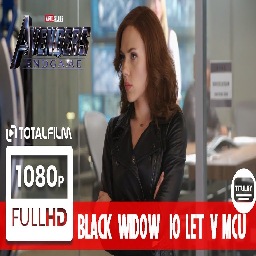


Input Image



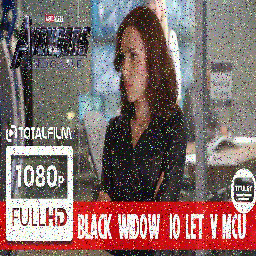


Denoised Image



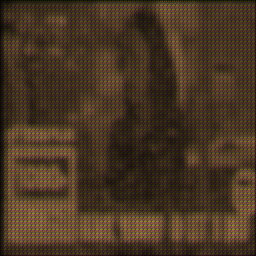


********************************************************

Original Image



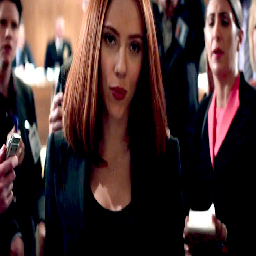


Input Image



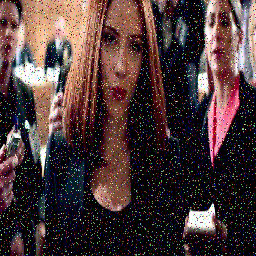


Denoised Image



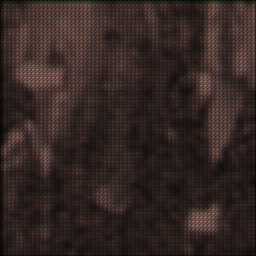


********************************************************


In [ ]:
for i in range(len(x_test)):
  print('\nOriginal Image\n')
  img2=y_test[i]
  image2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB )
  cv2_imshow(image2)
  print('\nInput Image\n')
  img=x_test[i]
  image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB )
  cv2_imshow(image)
  print('\nDenoised Image\n')
  img1=y_pred[i]
  image1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB )
  cv2_imshow(image1)
  print('\n********************************************************')

## Conclusion: We have obtained a train accuracy of 33%, validation accuracy of 22% and test accuracy of 34%. We will have to train our model on large data with more epochs to attain a high accuracy.